## Import Dependency

In [237]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, ElasticNet, Lasso
import xgboost as xgb
from catboost import CatBoostRegressor

from sklearn.metrics import root_mean_squared_error

import pickle

## Load Data

In [238]:
df = pd.read_csv(r"C:\Users\nene0\Desktop\Projects\kaggle_Used_Car_Regression\featured_train_2024-09-18_16-54-23.csv")

df.head()

,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,age,age_bins,mi_per_year,hp,engine_liter,cylinder,engine_efficiency,brand_rank,num_gear
0,MINI,Cooper S Base,213000,Gasoline,Automatic,Yellow,Gray,None reported,Yes,4200,17,16-20 Years,12529.41,172.0,1.6,4.0,107.50,28.0,6
1,Lincoln,LS V8,143250,Gasoline,Automatic,Silver,Beige,At least 1 accident or damage reported,Yes,4999,22,Old,6511.36,252.0,3.9,8.0,64.62,21.0,6
2,Chevrolet,Silverado 2500 LT,136731,E85 Flex Fuel,Automatic,Blue,Gray,None reported,Yes,13900,22,Old,6215.05,360.0,5.3,8.0,67.92,4.0,6
3,Genesis,G90 5.0 Ultimate,19500,Gasoline,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,7,6-10 Years,2785.71,420.0,5.0,8.0,84.00,29.0,6
4,Mercedes-Benz,Metris Base,7388,Gasoline,Automatic,Black,Beige,None reported,Yes,97500,3,3-5 Years,2462.67,208.0,2.0,4.0,104.00,2.0,7


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188373 entries, 0 to 188372
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   brand              188373 non-null  object 
 1   model              188373 non-null  object 
 2   milage             188373 non-null  int64  
 3   fuel_type          188373 non-null  object 
 4   transmission       188373 non-null  object 
 5   ext_col            188373 non-null  object 
 6   int_col            188373 non-null  object 
 7   accident           188373 non-null  object 
 8   clean_title        188373 non-null  object 
 9   price              188373 non-null  int64  
 10  age                188373 non-null  int64  
 11  age_bins           188211 non-null  object 
 12  mi_per_year        188373 non-null  float64
 13  hp                 188373 non-null  float64
 14  engine_liter       188373 non-null  float64
 15  cylinder           188373 non-null  float64
 16  en

In [240]:
df['price'].describe()

count    188373.000000
mean      42206.763283
std       49034.762873
min        2000.000000
25%       17000.000000
50%       30775.000000
75%       49883.000000
max      749950.000000
Name: price, dtype: float64

## Preprocessing

### Numeric Feature Scaling

In [241]:
# Separate the target variable.

target_var = df['price']

In [242]:
df.drop(columns=['price', 'num_gear'], inplace=True)

In [243]:
pre_scale_data = df[df.select_dtypes(['float', 'int']).columns]

pre_scale_data

,milage,age,mi_per_year,hp,engine_liter,cylinder,engine_efficiency,brand_rank
0,213000,17,12529.41,172.0,1.6,4.0,107.50,28.0
1,143250,22,6511.36,252.0,3.9,8.0,64.62,21.0
2,136731,22,6215.05,360.0,5.3,8.0,67.92,4.0
3,19500,7,2785.71,420.0,5.0,8.0,84.00,29.0
4,7388,3,2462.67,208.0,2.0,4.0,104.00,2.0
...,...,...,...,...,...,...,...,...
188368,49000,7,7000.00,420.0,6.2,8.0,67.74,11.0
188369,28600,6,4766.67,385.0,3.0,6.0,128.33,2.0
188370,13650,3,4550.00,469.0,4.0,8.0,117.25,2.0
188371,13895,2,6947.50,333.0,3.0,6.0,111.00,5.0


In [244]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(pre_scale_data), columns=pre_scale_data.columns)

In [245]:
pickle.dump(scaler, open("scaler.pickle", "wb"))

In [246]:
scaled_data.head()

,milage,age,mi_per_year,hp,engine_liter,cylinder,engine_efficiency,brand_rank
0,2.957166,1.563313,0.610446,-1.602993,-1.667211,-1.640379,0.357775,2.092981
1,1.556537,2.448261,-0.348951,-0.849770,0.086883,1.213316,-1.009787,1.307822
2,1.425631,2.448261,-0.396189,0.167082,1.154592,1.213316,-0.904541,-0.598992
3,-0.928450,-0.206584,-0.942895,0.732000,0.925797,1.213316,-0.391705,2.205146
4,-1.171668,-0.914543,-0.994394,-1.264043,-1.362151,-1.640379,0.246150,-0.823323


### Log Transform

In [247]:
target_var.skew()

5.547478797658133

<Axes: >

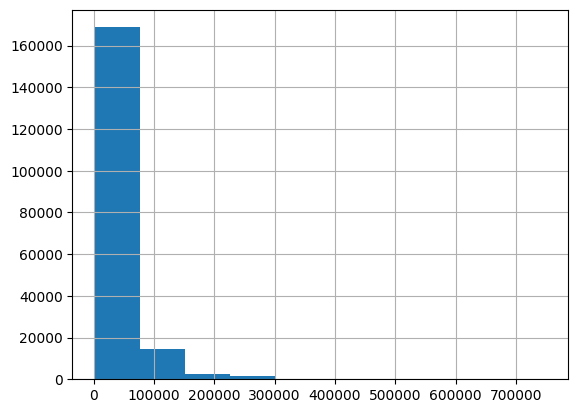

In [248]:
target_var.hist()

In [249]:
np.log(target_var).skew()

0.0176145846469097

In [250]:
log_target = np.log(target_var)

In [251]:
np.exp(log_target)

0          4200.0
1          4999.0
2         13900.0
3         45000.0
4         97500.0
           ...   
188368    27500.0
188369    30000.0
188370    86900.0
188371    84900.0
188372    28995.0
Name: price, Length: 188373, dtype: float64

### Categorical Encoding

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188373 entries, 0 to 188372
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   brand              188373 non-null  object 
 1   model              188373 non-null  object 
 2   milage             188373 non-null  int64  
 3   fuel_type          188373 non-null  object 
 4   transmission       188373 non-null  object 
 5   ext_col            188373 non-null  object 
 6   int_col            188373 non-null  object 
 7   accident           188373 non-null  object 
 8   clean_title        188373 non-null  object 
 9   age                188373 non-null  int64  
 10  age_bins           188211 non-null  object 
 11  mi_per_year        188373 non-null  float64
 12  hp                 188373 non-null  float64
 13  engine_liter       188373 non-null  float64
 14  cylinder           188373 non-null  float64
 15  engine_efficiency  188373 non-null  float64
 16  br

In [253]:
df['accident'].unique(), df['clean_title'].unique()

(array(['None reported', 'At least 1 accident or damage reported',
        'Unknown'], dtype=object),
 array(['Yes', 'Unknown'], dtype=object))

In [254]:
# Change 'None Reported' and 'Unknown' = 0, 'At least 1 accident or damage reported' = 1
# Change 'Yes' = 1, 'Unknown' = 0

df['accident'] =  df['accident'].map(lambda x: 1 if x=='At least 1 accident or damage reported' else 0)
df['clean_title'] =  df['clean_title'].map(lambda x: 1 if x=='Yes' else 0)

In [255]:
df.head()

,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,age,age_bins,mi_per_year,hp,engine_liter,cylinder,engine_efficiency,brand_rank
0,MINI,Cooper S Base,213000,Gasoline,Automatic,Yellow,Gray,0,1,17,16-20 Years,12529.41,172.0,1.6,4.0,107.50,28.0
1,Lincoln,LS V8,143250,Gasoline,Automatic,Silver,Beige,1,1,22,Old,6511.36,252.0,3.9,8.0,64.62,21.0
2,Chevrolet,Silverado 2500 LT,136731,E85 Flex Fuel,Automatic,Blue,Gray,0,1,22,Old,6215.05,360.0,5.3,8.0,67.92,4.0
3,Genesis,G90 5.0 Ultimate,19500,Gasoline,Transmission w/Dual Shift Mode,Black,Black,0,1,7,6-10 Years,2785.71,420.0,5.0,8.0,84.00,29.0
4,Mercedes-Benz,Metris Base,7388,Gasoline,Automatic,Black,Beige,0,1,3,3-5 Years,2462.67,208.0,2.0,4.0,104.00,2.0


In [256]:
df.describe(include='object')

,brand,model,fuel_type,transmission,ext_col,int_col,age_bins
count,188373,188373,188373,188373,188373,188373,188211
unique,57,1897,7,10,317,152,6
top,Ford,F-150 XLT,Gasoline,Automatic,Black,Black,6-10 Years
freq,23012,2944,166179,147710,48646,107628,62671


In [257]:
df.drop(columns=['ext_col', 'int_col', 'model'], inplace=True)

In [258]:
pre_enc_data = df[df.select_dtypes(['object']).columns]

pre_enc_data

,brand,fuel_type,transmission,age_bins
0,MINI,Gasoline,Automatic,16-20 Years
1,Lincoln,Gasoline,Automatic,Old
2,Chevrolet,E85 Flex Fuel,Automatic,Old
3,Genesis,Gasoline,Transmission w/Dual Shift Mode,6-10 Years
4,Mercedes-Benz,Gasoline,Automatic,3-5 Years
...,...,...,...,...
188368,Cadillac,Gasoline,Transmission w/Dual Shift Mode,6-10 Years
188369,Mercedes-Benz,Gasoline,Automatic,6-10 Years
188370,Mercedes-Benz,Gasoline,Automatic,3-5 Years
188371,Audi,Gasoline,Automatic,Fairly New


In [259]:
encoded_data = pd.get_dummies(pre_enc_data, dtype='int')

encoded_data.head()

,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,brand_Cadillac,brand_Chevrolet,...,transmission_Manual,transmission_Single-Speed Fixed Gear,transmission_Transmission Overdrive Switch,transmission_Transmission w/Dual Shift Mode,age_bins_11-15 Years,age_bins_16-20 Years,age_bins_3-5 Years,age_bins_6-10 Years,age_bins_Fairly New,age_bins_Old
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Merge DataFrames

In [260]:
scaled_data.head()

,milage,age,mi_per_year,hp,engine_liter,cylinder,engine_efficiency,brand_rank
0,2.957166,1.563313,0.610446,-1.602993,-1.667211,-1.640379,0.357775,2.092981
1,1.556537,2.448261,-0.348951,-0.849770,0.086883,1.213316,-1.009787,1.307822
2,1.425631,2.448261,-0.396189,0.167082,1.154592,1.213316,-0.904541,-0.598992
3,-0.928450,-0.206584,-0.942895,0.732000,0.925797,1.213316,-0.391705,2.205146
4,-1.171668,-0.914543,-0.994394,-1.264043,-1.362151,-1.640379,0.246150,-0.823323


In [261]:
encoded_data.head()

,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,brand_Cadillac,brand_Chevrolet,...,transmission_Manual,transmission_Single-Speed Fixed Gear,transmission_Transmission Overdrive Switch,transmission_Transmission w/Dual Shift Mode,age_bins_11-15 Years,age_bins_16-20 Years,age_bins_3-5 Years,age_bins_6-10 Years,age_bins_Fairly New,age_bins_Old
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [262]:
train = pd.concat([encoded_data, scaled_data], axis=1)

train.head()

,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,brand_Cadillac,brand_Chevrolet,...,age_bins_Fairly New,age_bins_Old,milage,age,mi_per_year,hp,engine_liter,cylinder,engine_efficiency,brand_rank
0,0,0,0,0,0,0,0,0,0,0,...,0,0,2.957166,1.563313,0.610446,-1.602993,-1.667211,-1.640379,0.357775,2.092981
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1.556537,2.448261,-0.348951,-0.849770,0.086883,1.213316,-1.009787,1.307822
2,0,0,0,0,0,0,0,0,0,1,...,0,1,1.425631,2.448261,-0.396189,0.167082,1.154592,1.213316,-0.904541,-0.598992
3,0,0,0,0,0,0,0,0,0,0,...,0,0,-0.928450,-0.206584,-0.942895,0.732000,0.925797,1.213316,-0.391705,2.205146
4,0,0,0,0,0,0,0,0,0,0,...,0,0,-1.171668,-0.914543,-0.994394,-1.264043,-1.362151,-1.640379,0.246150,-0.823323


In [263]:
train.isna().sum().sum()

0

In [264]:
pickle.dump(train.columns, open("slected_fetures.pickle", "wb"))

## Model Training

### Train Test Split

In [265]:
X = train
y = log_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [266]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150698, 88), (37675, 88), (150698,), (37675,))

### Model

#### XGBoost

In [206]:
xgbr = xgb.XGBRegressor(n_estimators=1500, learning_rate=0.01)
xgbr.fit(X_train, y_train)
xgbr_pred = xgbr.predict(X_test)

root_mean_squared_error(np.exp(y_test), np.exp(xgbr_pred))

41589.12982664669

In [132]:
# root_mean_squared_error(np.exp(y_test), np.exp(xgbr_pred)) / target_var.median()

In [63]:
pickle.dump(xgbr, open("xgboost_model.pickle", "wb"))

42480 <- before removing the model.
- n_estimators=1000, learning_rate=0.01: 41633.83542641763
- n_estimators=1500, learning_rate=0.01: 41563.40110724915
- n_estimators=1000, learning_rate=0.01: 41721.66544004208 <- without num_gear, with model
- n_estimators=1500, learning_rate=0.01: 41584.57214916461 <- without num_gear, model

#### Catboost

In [271]:
cbr = CatBoostRegressor()
cbr.fit(X_train, y_train)
cbr_pred = cbr.predict(X_test)

root_mean_squared_error(np.exp(y_test), np.exp(cbr_pred))

Learning rate set to 0.090432
0:	learn: 0.7919367	total: 10.8ms	remaining: 10.8s
1:	learn: 0.7538549	total: 20ms	remaining: 9.96s
2:	learn: 0.7206111	total: 28.2ms	remaining: 9.38s
3:	learn: 0.6915959	total: 38.4ms	remaining: 9.57s
4:	learn: 0.6656909	total: 49ms	remaining: 9.75s
5:	learn: 0.6432899	total: 56.7ms	remaining: 9.4s
6:	learn: 0.6240455	total: 67.1ms	remaining: 9.52s
7:	learn: 0.6070192	total: 76.4ms	remaining: 9.47s
8:	learn: 0.5925516	total: 84.5ms	remaining: 9.3s
9:	learn: 0.5800100	total: 92.6ms	remaining: 9.17s
10:	learn: 0.5688848	total: 101ms	remaining: 9.04s
11:	learn: 0.5593428	total: 110ms	remaining: 9.02s
12:	learn: 0.5511650	total: 119ms	remaining: 9.05s
13:	learn: 0.5440456	total: 128ms	remaining: 8.98s
14:	learn: 0.5381215	total: 136ms	remaining: 8.9s
15:	learn: 0.5325737	total: 145ms	remaining: 8.93s
16:	learn: 0.5281256	total: 154ms	remaining: 8.9s
17:	learn: 0.5239570	total: 163ms	remaining: 8.89s
18:	learn: 0.5206143	total: 171ms	remaining: 8.83s
19:	learn

41531.72693462394

- 41573.50349859435 <- Without the model feature
- 41502.53835278983 <- With model feature
- 41495.6128712774 <- With model feature and new features from feature engineering.

In [211]:
pickle.dump(cbr, open("catboost_model.pickle", "wb"))

In [67]:
weighted_pred = cbr_pred * 0.7 + xgbr_pred * 0.3
y_test_inv = np.exp(y_test)
print('Weighted RMSE:', root_mean_squared_error(y_test_inv, np.exp(weighted_pred)))

Weighted RMSE: 41563.06942067563


#### Lasso - Selecting Features

In [212]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

root_mean_squared_error(np.exp(y_test), np.exp(lasso_pred))

44111.11926584182

In [213]:
feature_importance = np.abs(lasso.coef_)
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [214]:
importance_df[importance_df['Importance'] > 0]

,Feature,Importance
1977,milage,0.327200
1978,age,0.286644
1980,hp,0.119203
43,brand_Porsche,0.100918
1971,age_bins_11-15 Years,0.079384
1981,engine_liter,0.039352
1982,cylinder,0.023294
1973,age_bins_3-5 Years,0.004209
1979,mi_per_year,0.002082
